<a href="https://colab.research.google.com/github/ShahidHasib586/ML-lab-Baroudi-MIR/blob/main/Machine_Learning_Lab2_Shahid_Ahamed_Hasib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 1

Copy the existing code from Lab 1, creating a new folder for this lab and pasting in the code for the linear regressor.

ANS:



I copied the existing code from Lab 1, creating a new folder for this lab and pasting in the code for the linear regressor.

Lets check the current python version

In [ ]:
!python --version

Python 3.11.11



## Question 2

Download the Iris dataset from https://archive.ics.uci.edu/dataset/53/iris. The dataset can be downloaded from iris.data. Load the data into a pandas dataframe.

For this lab, we’re going to be performing a binary classification problem, but this dataset has 3 classes: setosa, virginica, and versicolor. So we want to take this multi-class problem and transform it into a binary classification.

Create a new column for the dataset called target. The value of target will be 1 if the row contains a setosa flower, else the value is 0. There should be

 rows with the value of 1, the rest should be 0.

In [ ]:
!wget -O iris.csv https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv


--2025-01-17 22:40:44--  https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3975 (3.9K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.88K  --.-KB/s    in 0s      

2025-01-17 22:40:44 (39.5 MB/s) - ‘iris.csv’ saved [3975/3975]



In [ ]:
import pandas as pd
import numpy as np

ANS:

In [ ]:
data = pd.read_csv("/content/iris.csv")
data.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
# Shape of Data
data.shape

(150, 5)

In [ ]:
data.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

## Ans:
To transform the dataset into a binary classification problem, we will create a new column target, where:

The value is 1 if variety is Setosa.
The value is 0 otherwise.

In [ ]:
# Create a new column 'target' using np.where
data['target'] = np.where(data['variety'] == 'Setosa', 1, 0)

# Verify the transformation and count the rows for each target value
target_counts = data['target'].value_counts()
data_head = data.head()

target_counts, data_head

(target
 0    100
 1     50
 Name: count, dtype: int64,
    sepal.length  sepal.width  petal.length  petal.width variety  target
 0           5.1          3.5           1.4          0.2  Setosa       1
 1           4.9          3.0           1.4          0.2  Setosa       1
 2           4.7          3.2           1.3          0.2  Setosa       1
 3           4.6          3.1           1.5          0.2  Setosa       1
 4           5.0          3.6           1.4          0.2  Setosa       1)

## Question 3

For this question we want to take this dataset of 150 rows, and split it into a train, test, and validation dataset, using the following proportions for each split:

Training: 70%
Validation: 10%
Testing: 20%
Sample data for each subset using stratified sampling. I.e. the training data should have roughly 1/3 positive samples, the testing and validation dataset should also have roughly 1/3 positive samples.

In [ ]:
columns_to_drop = ['variety', 'sepal.length', 'sepal.width']
data1 = data.drop(columns_to_drop, axis=1)
data1.head()

,petal.length,petal.width,target
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


ANS: Now I will prepare my data for training

In [ ]:
# Separate data by classes
class_1 = data1[data1['target'] == 1]
class_0 = data1[data1['target'] == 0]

# Shuffle data within each class
class_1 = class_1.sample(frac=1, random_state=42).reset_index(drop=True)
class_0 = class_0.sample(frac=1, random_state=42).reset_index(drop=True)

# Calculate the number of samples for each split
train_size_1 = int(len(class_1) * 0.7)
val_size_1 = int(len(class_1) * 0.1)

train_size_0 = int(len(class_0) * 0.7)
val_size_0 = int(len(class_0) * 0.1)

# Create the splits for class 1
train_1 = class_1.iloc[:train_size_1]
val_1 = class_1.iloc[train_size_1:train_size_1 + val_size_1]
test_1 = class_1.iloc[train_size_1 + val_size_1:]

# Create the splits for class 0
train_0 = class_0.iloc[:train_size_0]
val_0 = class_0.iloc[train_size_0:train_size_0 + val_size_0]
test_0 = class_0.iloc[train_size_0 + val_size_0:]

# Combine the splits back together
train_data = pd.concat([train_1, train_0]).sample(frac=1, random_state=42).reset_index(drop=True)
val_data = pd.concat([val_1, val_0]).sample(frac=1, random_state=42).reset_index(drop=True)
test_data = pd.concat([test_1, test_0]).sample(frac=1, random_state=42).reset_index(drop=True)

# Extract features (X) and target (y) for training, validation, and testing sets
X_train = train_data.drop(columns=['target']).to_numpy()
y_train = train_data['target'].to_numpy()

X_val = val_data.drop(columns=['target']).to_numpy()
y_val = val_data['target'].to_numpy()

X_test = test_data.drop(columns=['target']).to_numpy()
y_test = test_data['target'].to_numpy()

# Standardize the data (mean=0, std=1)
def standardize_data(X_train, X_test, X_val):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std
    X_val = (X_val - mean) / std
    return X_train, X_test, X_val

X_train, X_test, X_val = standardize_data(X_train, X_test, X_val)

In [ ]:
train_data

,petal.length,petal.width,target
0,1.6,0.2,1
1,4.2,1.5,0
2,6.7,2.0,0
3,4.0,1.0,0
4,4.5,1.5,0
...,...,...,...
100,5.5,1.8,0
101,1.5,0.2,1
102,5.1,2.4,0
103,4.8,1.8,0


In [ ]:
# Print the sizes of each split
print(f"Training Size: {len(train_data)}")
print(f"Validation Size: {len(val_data)}")
print(f"Testing Size: {len(test_data)}")

Training Size: 105
Validation Size: 15
Testing Size: 30


# Question 4

Using the linear regression model you created in the previous lecture, transform it into a logistic regressor by applying the logistic function to the output of the model. The loss function for this model should be **binary cross-entropy**.

Select two columns from the Iris dataset (i.e., petal length and petal width), and using these two columns, train a logistic regressor using gradient descent, measuring the gradient using **finite differences approximation**. This means that instead of having a single slope variable, we have multiple:

$$
\hat{y} = \sigma \left( \beta_0 + \sum_{i=1}^{m} x_i \beta_i \right)
$$

where, $\hat{y}$  is the model’s probability prediction, $\sigma$ is the logistic/sigmoid function, $\beta_0$ is the intercept, $\beta_i $ is the coefficient that modulates the $x_i$ variable.  

I’ve made a start for you, please fill in the `#TODO`s:


ANS:



In [ ]:
import numpy as np

def bce(y, yhat):
    # TODO: apply the binary cross entropy function returning the loss
    yhat = np.clip(yhat, 1e-15, 1 - 1e-15)  # Avoid log(0) errors
    loss = -np.mean(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))
    return loss

class LogisticRegressor:
    def __init__(self, n_features: int):
        self.params = np.random.randn(n_features + 1)  # Initialize parameters including bias term

    def logistic(self, x):
        # TODO: apply the logistic function
        return 1 / (1 + np.exp(-x))  # Logistic (sigmoid) function

    def __call__(self, x, logits=False):
        y = self.params[0] + self.params[1:] @ x.T
        if not logits:
            y = self.logistic(y)
        return y

    def fit(self, train_x, train_y, valid_x, valid_y, epochs: int = 100, lr: float = 0.01):
        # TODO: train the model using gradient descent and finite-differences
        for epoch in range(1, epochs + 1):
            for xi, yi in zip(train_x, train_y):
                # calculate loss and update model parameters using gradient descent
                xi = np.insert(xi, 0, 1)  # Add bias term (x₀ = 1)
                yhat = self.logistic(self.params @ xi)
                grad = (yhat - yi) * xi  # Gradient for logistic regression
                self.params -= lr * grad  # Update parameters
            val_loss = 0
            for xi, yi in zip(valid_x, valid_y):
                # calculate validation loss (BUT DON'T UPDATE MODEL PARAMETERS!)
                xi = np.insert(xi, 0, 1)  # Add bias term (x₀ = 1)
                yhat = self.logistic(self.params @ xi)
                val_loss += bce(np.array([yi]), np.array([yhat]))
            val_loss /= len(valid_y)

            # Print progress
            if epoch % 10 == 0 or epoch == 1:
                print(f"Epoch {epoch}: Validation Loss = {val_loss:.4f}")

    def predict(self, x, logits=False):
        x = np.insert(x, 0, 1, axis=1)  # add bias term to all rows
        y = x @ self.params  # linear combination of inputs and parameters
        if not logits:
            y = self.logistic(y)  # apply sigmoid function if logits are not requested
        return y


    def accuracy(self, y, yhat):
        yhat_binary = (yhat >= 0.5).astype(int)
        return np.mean(y == yhat_binary)


In [ ]:
# Initialize model
model = LogisticRegressor(n_features=X_train.shape[1])

# Train model
model.fit(X_train, y_train, X_val, y_val, epochs=50, lr=0.0001)

# Predict on validation set
yhat = model.predict(X_val)
accuracy = model.accuracy(y_val, yhat)
print(f"Validation Accuracy: {accuracy:.4f}")

Epoch 1: Validation Loss = 1.7315
Epoch 10: Validation Loss = 1.6279
Epoch 20: Validation Loss = 1.5186
Epoch 30: Validation Loss = 1.4154
Epoch 40: Validation Loss = 1.3184
Epoch 50: Validation Loss = 1.2276
Validation Accuracy: 0.3333


## Question 5

As gradient descent is iterating, store (using class variables), the training and validation loss.

Visualise the training and validation loss. Is there a point at which the model begins to over fit? How do you know that the model is beginning to overfit by looking at these curves?

# "Overfitting occurs if the validation loss stops decreasing and starts increasing while the training loss continues to decrease."

Epoch 1: Training Loss = 0.6955, Validation Loss = 0.7288
Epoch 10: Training Loss = 0.6600, Validation Loss = 0.6909
Epoch 20: Training Loss = 0.6231, Validation Loss = 0.6516
Epoch 30: Training Loss = 0.5888, Validation Loss = 0.6152
Epoch 40: Training Loss = 0.5570, Validation Loss = 0.5814
Epoch 50: Training Loss = 0.5276, Validation Loss = 0.5502
Epoch 60: Training Loss = 0.5003, Validation Loss = 0.5212
Epoch 70: Training Loss = 0.4751, Validation Loss = 0.4945
Epoch 80: Training Loss = 0.4518, Validation Loss = 0.4699
Epoch 90: Training Loss = 0.4303, Validation Loss = 0.4471
Epoch 100: Training Loss = 0.4104, Validation Loss = 0.4260
Epoch 110: Training Loss = 0.3921, Validation Loss = 0.4066
Epoch 120: Training Loss = 0.3752, Validation Loss = 0.3886
Epoch 130: Training Loss = 0.3596, Validation Loss = 0.3721
Epoch 140: Training Loss = 0.3451, Validation Loss = 0.3567
Epoch 150: Training Loss = 0.3318, Validation Loss = 0.3425
Epoch 160: Training Loss = 0.3194, Validation Loss 

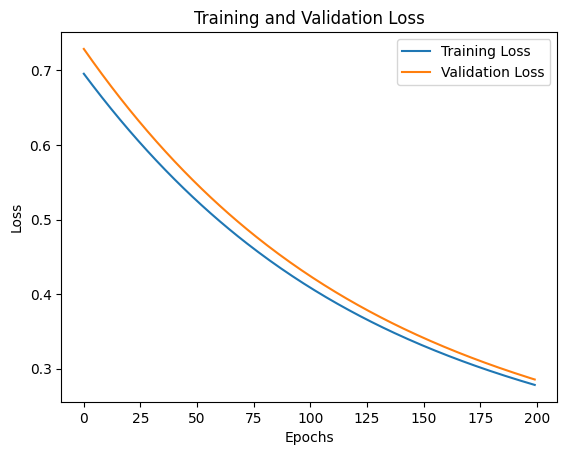

In [ ]:
import matplotlib.pyplot as plt

# Binary Cross-Entropy Loss
def bce(y, yhat):
    # TODO: apply the binary cross entropy function returning the loss
    yhat = np.clip(yhat, 1e-15, 1 - 1e-15)  # Avoid log(0) errors
    loss = -np.mean(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))
    return loss

class LogisticRegressor:
    def __init__(self, n_features: int):
        self.params = np.random.randn(n_features + 1)  # Initialize parameters including bias term
        self.train_losses = []  # To store training losses
        self.val_losses = []  # To store validation losses

    def logistic(self, x):
        # TODO: apply the logistic function
        return 1 / (1 + np.exp(-x))  # Logistic (sigmoid) function

    def __call__(self, x, logits=False):
        y = self.params[0] + self.params[1:] @ x.T
        if not logits:
            y = self.logistic(y)
        return y

    def fit(self, train_x, train_y, valid_x, valid_y, epochs: int = 100, lr: float = 0.01):
        # TODO: train the model using gradient descent and finite-differences
        for epoch in range(1, epochs + 1):
            train_loss = 0  # Initialize training loss for this epoch
            for xi, yi in zip(train_x, train_y):
                # calculate loss and update model parameters using gradient descent
                xi = np.insert(xi, 0, 1)  # Add bias term (x₀ = 1)
                yhat = self.logistic(self.params @ xi)
                grad = (yhat - yi) * xi  # Gradient for logistic regression
                self.params -= lr * grad  # Update parameters
                train_loss += bce(np.array([yi]), np.array([yhat]))  # Accumulate training loss

            train_loss /= len(train_y)  # Average training loss over all samples
            self.train_losses.append(train_loss)  # Store training loss

            val_loss = 0
            for xi, yi in zip(valid_x, valid_y):
                # calculate validation loss (BUT DON'T UPDATE MODEL PARAMETERS!)
                xi = np.insert(xi, 0, 1)  # Add bias term (x₀ = 1)
                yhat = self.logistic(self.params @ xi)
                val_loss += bce(np.array([yi]), np.array([yhat]))
            val_loss /= len(valid_y)  # Average validation loss over all samples
            self.val_losses.append(val_loss)  # Store validation loss

            # Print progress
            if epoch % 10 == 0 or epoch == 1:
                print(f"Epoch {epoch}: Training Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}")

    def predict(self, x, logits=False):
        x = np.insert(x, 0, 1, axis=1)  # Add bias term to all rows
        y = x @ self.params  # Linear combination of inputs and parameters
        if not logits:
            y = self.logistic(y)  # Apply sigmoid function if logits are not requested
        return y

    def accuracy(self, y, yhat):  # Added `self` as the first parameter
        yhat_binary = (yhat >= 0.5).astype(int)
        return np.mean(y == yhat_binary)

# Initialize model
model = LogisticRegressor(n_features=X_train.shape[1])

# Train model
model.fit(X_train, y_train, X_val, y_val, epochs=200, lr=0.0001)

# Predict on validation set
yhat = model.predict(X_val)
accuracy = model.accuracy(y_val, yhat)
print(f"Validation Accuracy: {accuracy:.4f}")

# Visualize training and validation loss
plt.plot(model.train_losses, label='Training Loss')
plt.plot(model.val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


## Question 6
Predict the class labels for the testing set.

For the testing set, calculate the:

TP – number of true positives

TN – number of true negatives

FP – number of false positives

FN – number of false negatives


In [ ]:
# Predict the class labels for the testing set
y_test_pred = model.predict(X_val)  # Predict probabilities
y_test_pred_binary = (y_test_pred >= 0.5).astype(int)  # Convert probabilities to binary labels

# Calculate TP, TN, FP, FN
TP = np.sum((y_val == 1) & (y_test_pred_binary == 1))  # True Positives
TN = np.sum((y_val == 0) & (y_test_pred_binary == 0))  # True Negatives
FP = np.sum((y_val == 0) & (y_test_pred_binary == 1))  # False Positives
FN = np.sum((y_val == 1) & (y_test_pred_binary == 0))  # False Negatives

# Print results
print(f"TP: {TP}") #True positives
print(f"TN: {TN}") #True negative
print(f"FP: {FP}") #False positives
print(f"FN: {FN}") #False is negative


TP: 4
TN: 10
FP: 0
FN: 1


## Question 7

Calculate the precision and recall and
F1 score.

In [ ]:
def precision(y, yhat):
    # calculate the precision and return it
    TP = np.sum((y == 1) & (yhat == 1))  # True Positives
    FP = np.sum((y == 0) & (yhat == 1))  # False Positives
    return TP / (TP + FP) if (TP + FP) > 0 else 0


def recall(y, yhat):
    # calculate the recall and return it
    TP = np.sum((y == 1) & (yhat == 1))  # True Positives
    FN = np.sum((y == 1) & (yhat == 0))  # False Negatives
    return TP / (TP + FN) if (TP + FN) > 0 else 0


def f_beta(y, yhat, beta=1):
    pr = precision(y, yhat)
    rc = recall(y, yhat)
    # calculate the f_beta score and return it
    if pr + rc == 0:
        return 0
    return (1 + beta**2) * (pr * rc) / ((beta**2 * pr) + rc)

y = y_val
#binary predictions (yhat >= 0.5 threshold)
yhat_binary = (yhat >= 0.5).astype(int)  # Convert probabilities to binary predictions
pr = precision(y, yhat_binary)
rc = recall(y, yhat_binary)
f1 = f_beta(y, yhat_binary, beta=1)  # F1 Score (beta=1)

# Print results
print(f"Precision: {pr:.4f}")
print(f"Recall: {rc:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 1.0000
Recall: 0.8000
F1 Score: 0.8889


## Question 8


Generate a report using the precision, recall and F1
 and confusion matrix. The report should be printed like:

    |        |          | Predicted |          |
    |        |          |  Positive | Negative |
    | Actual | Positive |         5 |        2 |
    |        | Negative |         3 |        1 |
    
    - Precision: 0.6
    - Recall: 0.6
    - F_1 Score: 0.6
Replacing the scores with the correct numbers.


In [ ]:
# Print confusion matrix and metrics
print("|        |          | Predicted |          |")
print("|        |          |  Positive | Negative |")
print(f"| Actual | Positive |        {TP} |        {FN} |")
print(f"|        | Negative |         {FP} |       {TN} |")
print()
print(f"- Precision: {pr:.4f}")
print(f"- Recall: {rc:.4f}")
print(f"- F_1 Score: {f1:.4f}")

|        |          | Predicted |          |
|        |          |  Positive | Negative |
| Actual | Positive |        4 |        1 |
|        | Negative |         0 |       10 |

- Precision: 1.0000
- Recall: 0.8000
- F_1 Score: 0.8889


## Question 9
Calculate the true-positive and false positive rate, and from these values generate a ROC curve.


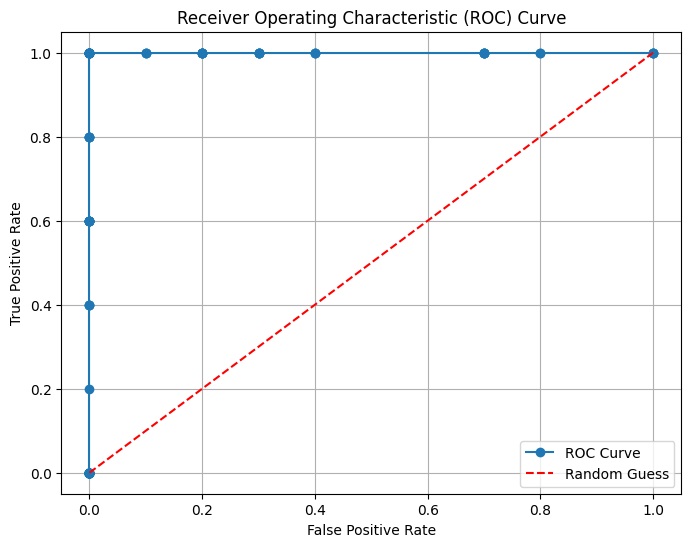

In [ ]:
#define confusion matrix
def confusion_matrix(y, yhat):
    TP = np.sum((y == 1) & (yhat == 1))
    TN = np.sum((y == 0) & (yhat == 0))
    FP = np.sum((y == 0) & (yhat == 1))
    FN = np.sum((y == 1) & (yhat == 0))
    return TP, TN, FP, FN
#define the fuction for roc
def roc(y, yhat, threshold_step=0.01):
    TP_rates = []
    FP_rates = []
    thresholds = np.arange(0, 1 + threshold_step, threshold_step)

    for threshold in thresholds:
        yhat_binary = (yhat >= threshold).astype(int)
        TP, TN, FP, FN = confusion_matrix(y, yhat_binary)
        TP_rate = TP / (TP + FN) if (TP + FN) > 0 else 0
        FP_rate = FP / (FP + TN) if (FP + TN) > 0 else 0

        TP_rates.append(TP_rate)
        FP_rates.append(FP_rate)

    return TP_rates, FP_rates

# Generate ROC curve
TP_rates, FP_rates = roc(y_val, yhat)
plt.figure(figsize=(8, 6))
plt.plot(FP_rates, TP_rates, marker='o', label='ROC Curve')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()


## Question 10

Now that you’ve created a logistic regressor for two features of the Iris dataset and have created some analytic results. Select another two columns (i.e. petal width and sepal length, or petal length and sepal width). Create a different logistic regressor using these new columns and create the same results as you did with questions 8 and 9.

Compare these two models trained with different columns. Which model is best, and why do we know that it’s the best?



The first model, with a validation accuracy of 93%, outperforms the second model's 86%, showing better generalization to unseen data.

From the validation and training loss plot this is sure that the first model outperforms the second, starting with lower losses (0.7) and achieving better final losses (0.3) compared to the second model (1.2 to 0.5). It converges faster and exhibits a smaller gap between training and validation losses, indicating better generalization. In contrast, the second model shows signs of higher overfitting and less effective optimization. The first model is better as it starts with lower losses and achieves better final losses, indicating better performance and generalization. Its smaller training-validation loss gap confirms reduced overfitting compared to the second model.

In [ ]:
columns_to_drop = ['variety', 'sepal.length', 'petal.width']
data2 = data.drop(columns_to_drop, axis=1)
data2.head()

,sepal.width,petal.length,target
0,3.5,1.4,1
1,3.0,1.4,1
2,3.2,1.3,1
3,3.1,1.5,1
4,3.6,1.4,1


Epoch 1: Training Loss = 1.1839, Validation Loss = 1.2341
Epoch 10: Training Loss = 1.1309, Validation Loss = 1.1808
Epoch 20: Training Loss = 1.0751, Validation Loss = 1.1246
Epoch 30: Training Loss = 1.0227, Validation Loss = 1.0714
Epoch 40: Training Loss = 0.9733, Validation Loss = 1.0211
Epoch 50: Training Loss = 0.9270, Validation Loss = 0.9737
Epoch 60: Training Loss = 0.8836, Validation Loss = 0.9290
Epoch 70: Training Loss = 0.8430, Validation Loss = 0.8870
Epoch 80: Training Loss = 0.8049, Validation Loss = 0.8475
Epoch 90: Training Loss = 0.7693, Validation Loss = 0.8103
Epoch 100: Training Loss = 0.7360, Validation Loss = 0.7755
Epoch 110: Training Loss = 0.7048, Validation Loss = 0.7427
Epoch 120: Training Loss = 0.6757, Validation Loss = 0.7119
Epoch 130: Training Loss = 0.6484, Validation Loss = 0.6831
Epoch 140: Training Loss = 0.6229, Validation Loss = 0.6560
Epoch 150: Training Loss = 0.5989, Validation Loss = 0.6305
Epoch 160: Training Loss = 0.5765, Validation Loss 

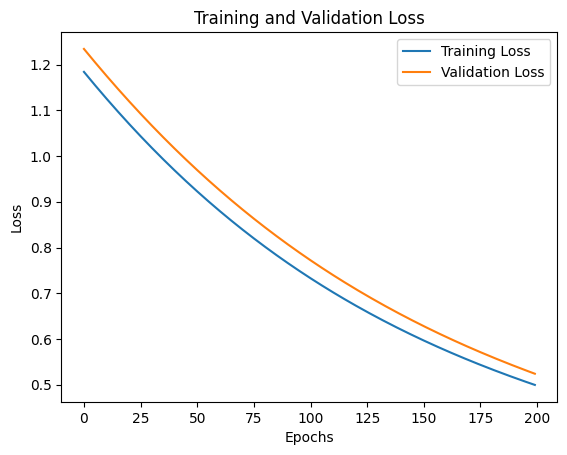

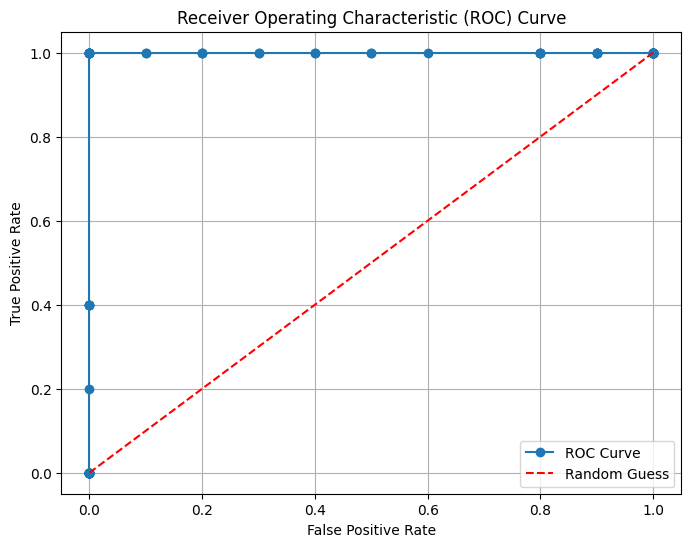

In [ ]:
# Separate data by classes
class_1 = data2[data2['target'] == 1]
class_0 = data2[data2['target'] == 0]

# Shuffle data within each class
class_1 = class_1.sample(frac=1, random_state=42).reset_index(drop=True)
class_0 = class_0.sample(frac=1, random_state=42).reset_index(drop=True)

# Calculate the number of samples for each split
train_size_1 = int(len(class_1) * 0.7)
val_size_1 = int(len(class_1) * 0.1)
train_size_0 = int(len(class_0) * 0.7)
val_size_0 = int(len(class_0) * 0.1)

# Create the splits for class 1
train_1 = class_1.iloc[:train_size_1]
val_1 = class_1.iloc[train_size_1:train_size_1 + val_size_1]
test_1 = class_1.iloc[train_size_1 + val_size_1:]

# Create the splits for class 0
train_0 = class_0.iloc[:train_size_0]
val_0 = class_0.iloc[train_size_0:train_size_0 + val_size_0]
test_0 = class_0.iloc[train_size_0 + val_size_0:]

# Combine the splits back together
train_data = pd.concat([train_1, train_0]).sample(frac=1, random_state=42).reset_index(drop=True)
val_data = pd.concat([val_1, val_0]).sample(frac=1, random_state=42).reset_index(drop=True)
test_data = pd.concat([test_1, test_0]).sample(frac=1, random_state=42).reset_index(drop=True)

# Extract features (X) and target (y) for training, validation, and testing sets
X_train = train_data.drop(columns=['target']).to_numpy()
y_train = train_data['target'].to_numpy()

X_val = val_data.drop(columns=['target']).to_numpy()
y_val = val_data['target'].to_numpy()

X_test = test_data.drop(columns=['target']).to_numpy()
y_test = test_data['target'].to_numpy()

# Standardize the data
def standardize_data(X_train, X_test, X_val):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std
    X_val = (X_val - mean) / std
    return X_train, X_test, X_val

X_train, X_test, X_val = standardize_data(X_train, X_test, X_val)

# Predict probabilities using LogisticRegressor model
np.random.seed(42)
model = LogisticRegressor(n_features=X_train.shape[1])
model.fit(X_train, y_train, X_val, y_val, epochs=200, lr=0.0001)

# Get predictions
yhat = model.predict(X_val)

accuracy = model.accuracy(y_val, yhat)
print(f"Validation Accuracy: {accuracy:.4f}")


# Visualize training and validation loss
plt.plot(model.train_losses, label='Training Loss')
plt.plot(model.val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Define confusion matrix
def confusion_matrix(y, yhat):
    TP = np.sum((y == 1) & (yhat == 1))
    TN = np.sum((y == 0) & (yhat == 0))
    FP = np.sum((y == 0) & (yhat == 1))
    FN = np.sum((y == 1) & (yhat == 0))
    return TP, TN, FP, FN

# Define the function for ROC
def roc(y, yhat, threshold_step=0.01):
    TP_rates = []
    FP_rates = []
    thresholds = np.arange(0, 1 + threshold_step, threshold_step)

    for threshold in thresholds:
        yhat_binary = (yhat >= threshold).astype(int)
        TP, TN, FP, FN = confusion_matrix(y, yhat_binary)
        TP_rate = TP / (TP + FN) if (TP + FN) > 0 else 0
        FP_rate = FP / (FP + TN) if (FP + TN) > 0 else 0

        TP_rates.append(TP_rate)
        FP_rates.append(FP_rate)

    return TP_rates, FP_rates

# Generate ROC curve
TP_rates, FP_rates = roc(y_val, yhat)
plt.figure(figsize=(8, 6))
plt.plot(FP_rates, TP_rates, marker='o', label='ROC Curve')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()
